## ETL Extracción, transformación y cargadel dataset `linkedin_data_arabia_2020`

### 1. Importacion de Librerías

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

#Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

#helpers
import ast

### 2. Carga de datos

In [2]:
#Lectura del archivo
jobs = pd.read_csv("linkedin_data_arabia_2020 - Sheet1 (1).csv")

### Exploracion de datos

In [3]:
# Explorando las primeras 5 filas
jobs.head()

,linkedin_id,position_id,position,company,location,level,date,job_functions,industries,description
0,1632901070,51791,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",Mid-Senior level,6/1/2020,"['Marketing', 'Management']",['Banking'],NaN
1,1628497696,51792,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",Associate,6/1/2020,[''],['Government Administration'],Document Controller- (Saudi candidates only) ...
2,1666951758,51793,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",Mid-Senior level,6/1/2020,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",Auto req ID: 199735BRJob DescriptionPepsiCo Sa...
3,1671138260,51794,Strategic Workforce Analyst,Saudi Air Navigation Services,"Jeddah, Saudi Arabia",Mid-Senior level,6/1/2020,[''],['Aviation & Aerospace'],Role PurposeTo conduct workforce analysis to s...
4,1670725370,51795,"Account Manager, GPS – Riyadh",EY,"Riyadh, Saudi Arabia",Not Applicable,6/1/2020,"['Sales', 'Business Development']","['Accounting', 'Financial Services']",In a business where are our people are our pro...


In [4]:
# Explorando las ultimas 5 filas
jobs.tail()

,linkedin_id,position_id,position,company,location,level,date,job_functions,industries,description
48444,2276014180,191741,Sales Associate,Landmark Arabia,"Riyadh, Riyadh, Saudi Arabia",Entry level,10/10/2020,['Sales and Business Development'],"['Manufacturing, Financial Services, and Retail']",\n\n\nJob DescriptionSales associates work wit...
48445,2299433047,204967,SA,Landmark Arabia,"Riyadh, Riyadh, Saudi Arabia",Not Applicable,16/10/2020,['Other'],['Retail'],\n\n\n Deliver excellent customer servi...
48446,2280568685,205102,Restaurant Manager - Nandos,Landmark Arabia,"Riyadh, Riyadh, Saudi Arabia",Mid-Senior level,11/10/2020,['Management and Manufacturing'],['Retail'],\n\n\nJOB PURPOSETo consistently deliver the N...
48447,2275999769,205593,Restaurant Supervisor - Nandos,Landmark Arabia,"Riyadh, Riyadh, Saudi Arabia",Mid-Senior level,10/10/2020,['Management and Manufacturing'],['Retail'],\n\n\nJOB PURPOSE Ensure correct and effective...
48448,2299415687,205877,Group Exercise & Personal Training,Landmark Arabia,"Riyadh, Riyadh, Saudi Arabia",Entry level,16/10/2020,['Other'],['Retail'],\n\n\n1-2 years of relevant experience within ...


In [5]:
# Inforamcion general del dataframe
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48449 entries, 0 to 48448
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   linkedin_id    48443 non-null  object
 1   position_id    48449 non-null  int64 
 2   position       48449 non-null  object
 3   company        48447 non-null  object
 4   location       48436 non-null  object
 5   level          46758 non-null  object
 6   date           48449 non-null  object
 7   job_functions  48449 non-null  object
 8   industries     48449 non-null  object
 9   description    45268 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [6]:
#cantidad de filas
print("Cantidad de filas: " ,len(jobs) )

Cantidad de filas:  48449


In [7]:
#Datos nulos del dataframe
jobs.isnull().sum()

linkedin_id         6
position_id         0
position            0
company             2
location           13
level            1691
date                0
job_functions       0
industries          0
description      3181
dtype: int64

<Axes: title={'center': 'Datos Nulos'}>

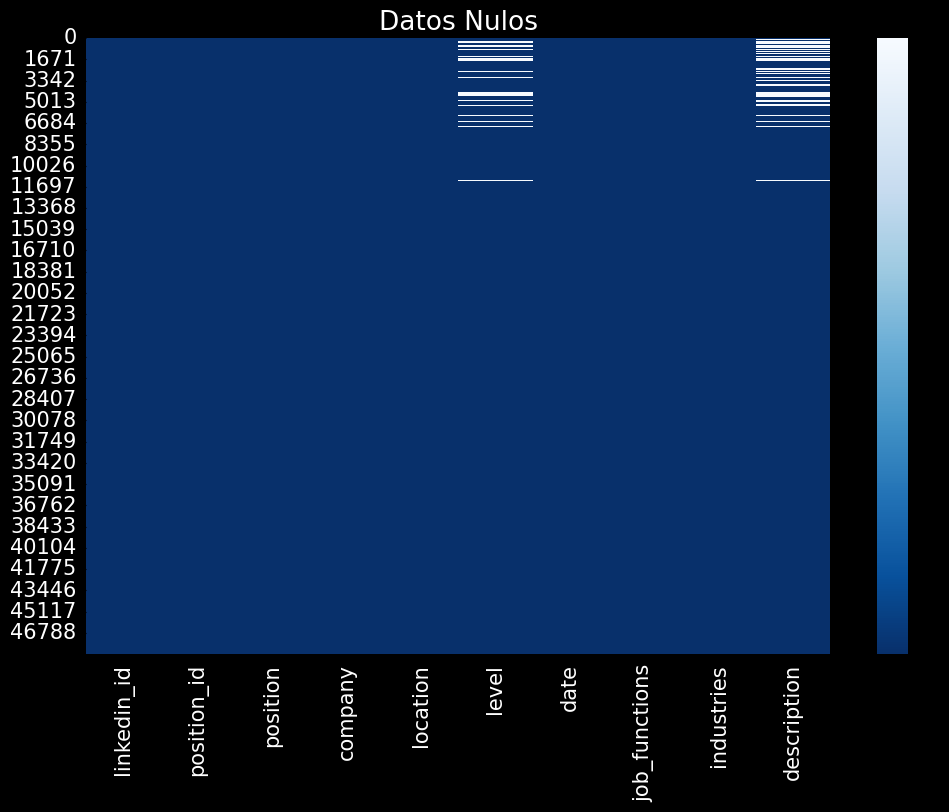

In [8]:
#Visualizando de datos
#Armado de figura
plt.figure("datos nulos",figsize=(12,8), facecolor="black")
plt.title('Datos Nulos', color='white', fontsize=19)     
plt.xticks(color='white', fontsize=15)      
plt.yticks(color='white', fontsize=15)  

# Plot
sns.heatmap(jobs.isnull(),cmap='Blues_r')

In [9]:

# Observacion de filas unicas y duplicadas por columna
columnas = ["description","industries", "company", "location", "level", "position", "job_functions"]

filas_duplicadas = jobs[columnas].duplicated().sum()

linkedin_id_duplicados = jobs["linkedin_id"].duplicated(keep=False).sum()

valores_unicos = jobs[columnas].nunique()

print(f"Filas duplicadas: {filas_duplicadas}")
print(f"Lindkedin ids duplicados: {linkedin_id_duplicados}")
print("\nValores unicos por columna:")
print(valores_unicos)

Filas duplicadas: 8656
Lindkedin ids duplicados: 6016

Valores unicos por columna:
description      33006
industries        3454
company           6967
location           294
level                7
position         21141
job_functions     2603
dtype: int64


In [10]:
print("Valores unicos de level: ", jobs["level"].unique())

Valores unicos de level:  ['Mid-Senior level' 'Associate' 'Not Applicable' 'Director' nan
 'Entry level' 'Executive' 'Internship']


## Transformacion de datos


In [11]:
# Agregar columna de ciudad y estado. Extrayendolas de la columna ubicacion
jobs['city'] = jobs['location'].str.extract('([A-Za-z]+)\,', expand=False)

In [12]:
# Cambiar tipo de dato de date a datetype
jobs["date"] = pd.to_datetime(jobs["date"], dayfirst=True)

In [13]:
# Agregar columna mes, dia y quartos a partir de columna date
jobs['day'] = jobs['date'].dt.strftime("%A")
jobs['month'] = jobs['date'].dt.strftime("%B")
jobs['quarter'] = pd.DatetimeIndex(jobs['date']).quarter


In [14]:
#Cambiando tipo de dato string a list de la columna industries y job functions
#Si es la primera vez que se ejecuta esta cell, descomentar el codigo, sino comentarlo

jobs['job_functions'] = jobs['job_functions'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
jobs['industries'] = jobs['industries'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
print(type(jobs['industries'].iloc[0]))
print(type(jobs['job_functions'].iloc[0]))

<class 'list'>
<class 'list'>


In [15]:
# Aca separo cada industria de industries y cada trabajo de job_functions en columnas separadas
#Decomentar el codigo si es la primera vez que se ejecuta

jobs['industries'] = jobs['industries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else (x if isinstance(x, list) else []))
industry_split = pd.DataFrame(jobs['industries'].to_list())
industry_split.columns = [f'industry_{i+1}' for i in industry_split.columns]

jobs['job_functions'] = jobs['job_functions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
jobs['job_functions'] = jobs['job_functions'].apply(lambda x: x if isinstance(x, list) else [])
job_split = pd.DataFrame(jobs['job_functions'].to_list())
job_split.columns = [f'job_function_{i+1}' for i in job_split.columns]

# agregando las nuevas columnas

jobs_modified_1 = pd.concat([jobs, industry_split], axis=1)
jobs_modified_2 = pd.concat([jobs_modified_1, job_split], axis=1)

In [16]:
#Limpiando datos vacios
for column in jobs_modified_2.columns:
   jobs_modified_2[column] = jobs_modified_2[column].replace(["None"," ", "", r"\[''\]"], np.nan)  

In [17]:
# Eliminar filas con linkedin_id duplicados. Conservando la primera instancia por fecha. 
# Primero ordeno las filas por fecha.
jobs_modified_2.sort_values(by='date', ascending=False, inplace=True)
# Luego suelto la primera instancia, que seria la menos actualizada.
jobs_modified_2.drop_duplicates(subset='linkedin_id', keep='first', inplace=True)
# Reseteo el index/orden  
jobs_modified_2.reset_index(drop=True, inplace=True)



In [18]:
#Drop de columnas no necesarias
jobs_modified_2.drop(['location',"description",'industries','job_functions'],axis=1,inplace=True)



In [19]:
# Ubicaciones nulas deben ser remotas
jobs_modified_2["city"] = jobs_modified_2["city"].fillna("remote")


In [20]:
jobs_modified_2[jobs_modified_2["city"].isnull()]


,linkedin_id,position_id,position,company,level,date,city,day,month,quarter,industry_1,industry_2,industry_3,job_function_1,job_function_2,job_function_3


In [21]:
jobs_modified_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44890 entries, 0 to 44889
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   linkedin_id     44889 non-null  object        
 1   position_id     44890 non-null  int64         
 2   position        44890 non-null  object        
 3   company         44888 non-null  object        
 4   level           43395 non-null  object        
 5   date            44890 non-null  datetime64[ns]
 6   city            44890 non-null  object        
 7   day             44890 non-null  object        
 8   month           44890 non-null  object        
 9   quarter         44890 non-null  int32         
 10  industry_1      41166 non-null  object        
 11  industry_2      21534 non-null  object        
 12  industry_3      17937 non-null  object        
 13  job_function_1  41119 non-null  object        
 14  job_function_2  28624 non-null  object        
 15  jo

In [22]:
# Corroboro que ya no hayas duplicados, cantidad de fullas y nulos
print("Cantidad de filas: " ,len(jobs_modified_2) )
print("Cantidad de nulos: " ,jobs_modified_2.isnull().sum() )
print("Cantidad de duplicados linkedin_id: " ,jobs_modified_2["linkedin_id"].duplicated().sum() )
print("Valores Unicos")
jobs_modified_2[["position", "company","level","city","industry_1","industry_2","industry_3","job_function_1","job_function_2","job_function_3"]].nunique()

Cantidad de filas:  44890
Cantidad de nulos:  linkedin_id           1
position_id           0
position              0
company               2
level              1495
date                  0
city                  0
day                   0
month                 0
quarter               0
industry_1         3724
industry_2        23356
industry_3        26953
job_function_1     3771
job_function_2    16266
job_function_3    36924
dtype: int64
Cantidad de duplicados linkedin_id:  0
Valores Unicos


position          21030
company            6957
level                 7
city                209
industry_1          166
industry_2          160
industry_3          157
job_function_1       83
job_function_2       67
job_function_3       60
dtype: int64

In [23]:
jobs_modified_2.head()

,linkedin_id,position_id,position,company,level,date,city,day,month,quarter,industry_1,industry_2,industry_3,job_function_1,job_function_2,job_function_3
0,2362841152,102381,supervisor,Landmark Arabia,Mid-Senior level,2020-12-31,Riyadh,Thursday,December,4,Marketing and Advertising,Consumer Goods,Retail,Other,None,None
1,2363584144,102505,Social Auditor - Contractor,Lloyd'S Register Group,Associate,2020-12-31,Khobar,Thursday,December,4,Electrical/Electronic Manufacturing,None,None,Accounting/Auditing,Finance,None
2,2363578492,102489,Sales Engineer,Rawabi Holding Co.,Entry level,2020-12-31,Dammam,Thursday,December,4,Marketing and Advertising,None,None,Sales,Business Development,None
3,2345271248,102490,Area Sales Manager - Petromin Automotive,Petromin Corporation,Mid-Senior level,2020-12-31,Ahsa,Thursday,December,4,Automotive,None,None,Sales,Business Development,Management
4,2363583496,102491,EBC Coordinator,"Marriott International, Inc",Associate,2020-12-31,Riyadh,Thursday,December,4,Food & Beverages,None,None,Other,None,None


### Transformacion de variables categorias a numericas

In [24]:
#Tabla donde las variables categoricas son representadas por variables numericas para posterior analisis
# level.